## Bibliotecas e Base de Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('heart.csv')

## Limpeza da Base de Dados

In [2]:
X = data.drop('target', axis = 1)
y = data['target']

## Métodos de Classificação

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_X_train = X_train
lr_X_test = X_test
lr_y_train = y_train
lr_y_test = y_test

for solver in solvers:
    lr = LogisticRegression(solver= solver, multi_class= 'ovr')
    lr.fit(lr_X_train, lr_y_train)
    lr_pred = lr.predict(lr_X_test)
    print ('Solver: ' + solver)
    print('Accuracy Score: {0:.3f}\n'.format(lr.score(lr_X_test, lr_y_test)))

Solver: newton-cg
Accuracy Score: 0.791

Solver: lbfgs
Accuracy Score: 0.802

Solver: liblinear
Accuracy Score: 0.802

Solver: sag
Accuracy Score: 0.659

Solver: saga
Accuracy Score: 0.670



/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [5]:
lr = LogisticRegression(solver= 'newton-cg', multi_class= 'ovr')
lr.fit(lr_X_train, lr_y_train)
lr_pred = lr.predict(lr_X_test)

print(classification_report(lr_y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        39
           1       0.78      0.88      0.83        52

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91



### Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB

nbc_X_train = X_train
nbc_X_test = X_test
nbc_y_train = y_train
nbc_y_test = y_test

nbc = GaussianNB()
nbc.fit(nbc_X_train, nbc_y_train)
nbc_pred = nbc.predict(nbc_X_test)
print('Accuracy Score: {0:.3f}\n'.format(nbc.score(nbc_X_test, nbc_y_test)))

Accuracy Score: 0.758



In [8]:
print(classification_report(nbc_y_test,nbc_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        39
           1       0.79      0.79      0.79        52

    accuracy                           0.76        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



### K-Nearest Neighbors (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_error_rate = []
knn_score = []

knn_X_train = X_train
knn_X_test = X_test
knn_y_train = y_train
knn_y_test = y_test

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(knn_X_train, knn_y_train)
    knn_pred = knn.predict(knn_X_test)
    knn_error_rate.append(np.mean(knn_pred != knn_y_test))
    knn_score.append(knn.score(knn_X_test, knn_y_test))

Text(0, 0.5, 'Error Rate')

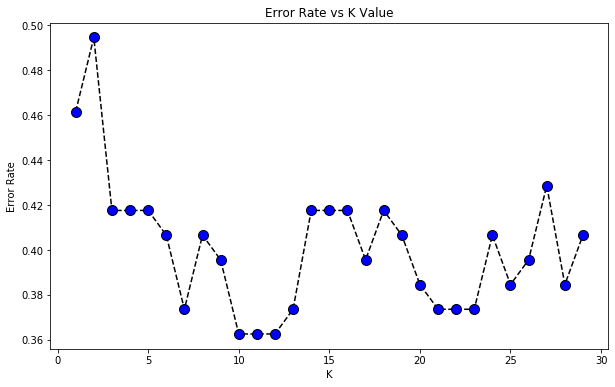

In [17]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_error_rate, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Score')

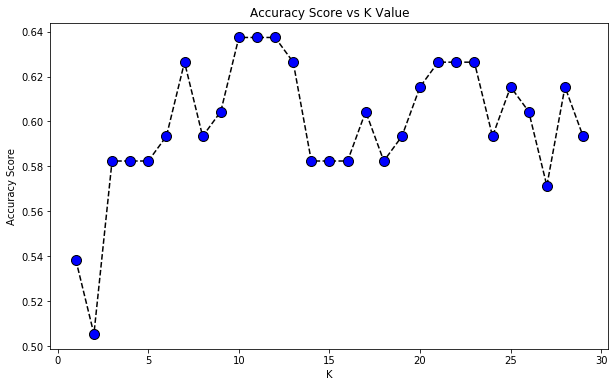

In [18]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_score, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Score vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [24]:
for i in range(9,12):
    print('K: ' + str(i))
    print('Accuracy Score: {0:.3f}'.format(knn_score[i]))
    print('Error Rate: {0:.3f}\n'.format(knn_error_rate[i]))

K: 9
Accuracy Score: 0.637
Error Rate: 0.363

K: 10
Accuracy Score: 0.637
Error Rate: 0.363

K: 11
Accuracy Score: 0.637
Error Rate: 0.363



In [25]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

print(classification_report(knn_y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        39
           1       0.72      0.60      0.65        52

    accuracy                           0.64        91
   macro avg       0.64      0.64      0.64        91
weighted avg       0.65      0.64      0.64        91



### Support Vector Machines (SVM)